In [11]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
df = pd.read_csv('../Dataset/processed/accepted_load_data_clean_v1.csv')

In [12]:
pd.set_option('display.max_columns',None)

In [13]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,term_clean,emp_length_clean
0,3600.0,3600.0,3600.0,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,5.91,0.0,2003-08-01,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,2019-01-01,122.67,2019-03-01,564.0,560.0,0.0,30.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,N,NaN,10.0
1,24700.0,24700.0,24700.0,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,16.06,1.0,1999-12-01,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,2016-06-01,926.35,2019-03-01,699.0,695.0,0.0,NaN,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,N,NaN,10.0
2,20000.0,20000.0,20000.0,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,10.78,0.0,2000-08-01,695.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,2017-06-01,15813.30,2019-03-01,704.0,700.0,0.0,NaN,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,N,NaN,10.0
3,35000.0,35000.0,35000.0,14.85,829.90,C,C5,MORTGAGE,110000.0,Source Verified,Current,debt_consolidation,17.06,0.0,2008-09-01,785.0,789.0,0.0,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,2019-02-01,829.90,2019-03-01,679.0,675.0,0.0,NaN,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,N,NaN,10.0
4,10400.0,10400.0,10400.0,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,25.37,1.0,1998-06-01,695.0,699.0

In [14]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

loan_amnt: float64
funded_amnt: float64
funded_amnt_inv: float64
int_rate: float64
installment: float64
grade: object
sub_grade: object
home_ownership: object
annual_inc: float64
verification_status: object
loan_status: object
purpose: object
dti: float64
delinq_2yrs: float64
earliest_cr_line: object
fico_range_low: float64
fico_range_high: float64
inq_last_6mths: float64
mths_since_last_delinq: float64
open_acc: float64
pub_rec: float64
revol_bal: float64
revol_util: float64
total_acc: float64
initial_list_status: object
out_prncp: float64
out_prncp_inv: float64
total_pymnt: float64
total_pymnt_inv: float64
total_rec_prncp: float64
total_rec_int: float64
total_rec_late_fee: float64
recoveries: float64
collection_recovery_fee: float64
last_pymnt_d: object
last_pymnt_amnt: float64
last_credit_pull_d: object
last_fico_range_high: float64
last_fico_range_low: float64
collections_12_mths_ex_med: float64
mths_since_last_major_derog: float64
policy_code: float64
application_type: object
acc_

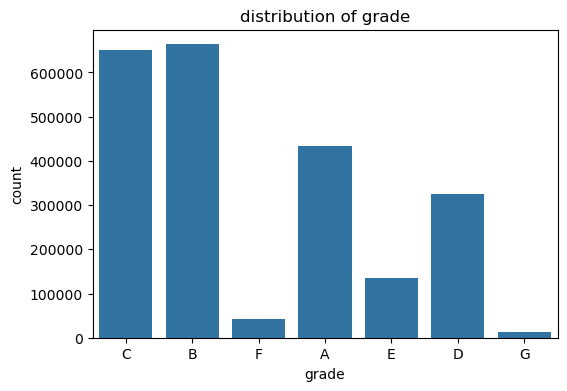

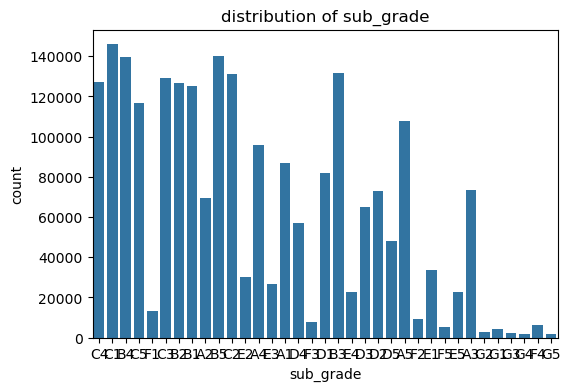

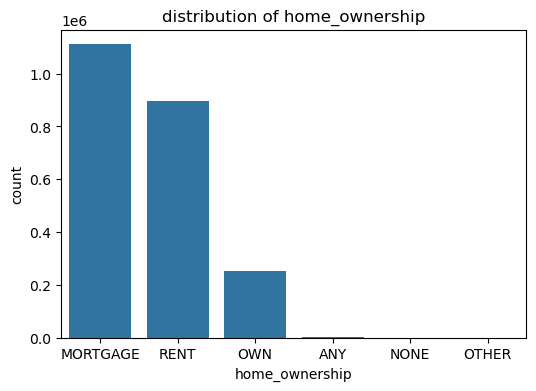

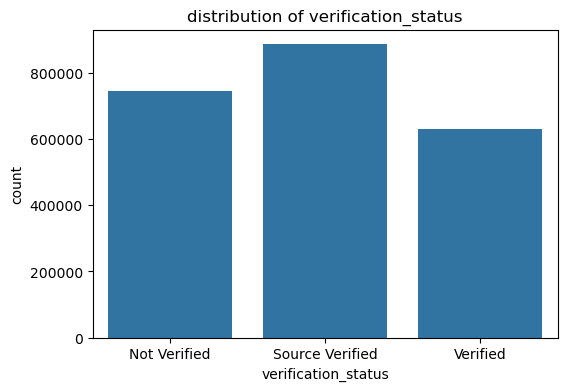

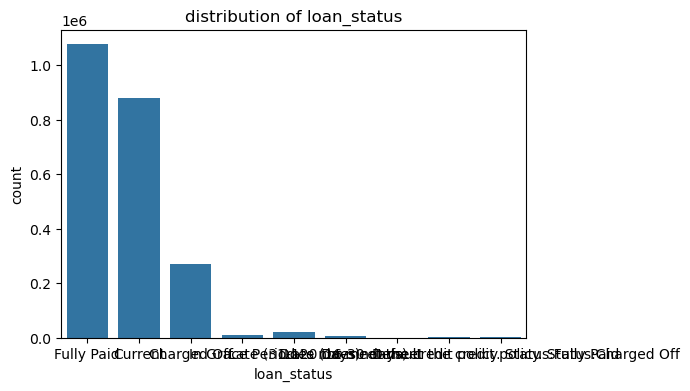

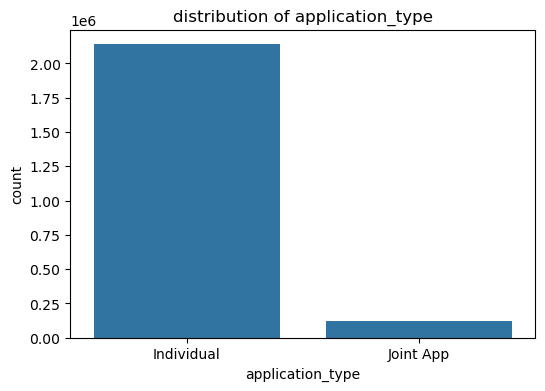

In [15]:
categories = ['grade','sub_grade','home_ownership','verification_status','loan_status','application_type']

for cat in categories:
    plt.figure(figsize=(6,4))
    sns.countplot(x=cat,data=df)
    plt.title(f'distribution of {cat}')
    plt.show()

In [16]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

### loan status has too many categories will simplify into good outcome and bad outcome

In [17]:
good_status=[
    'Fully Paid',
    'Current',
    'Does not meet the credit policy. Status:Fully Paid'
]

bad_status=[
    'Charged Off',
    'Late (31-120 days)',
    'In Grace Period',
    'Late (16-30 days)',
    'Does not meet the credit policy. Status:Charged Off',
    'Default'
]

df['target'] = df['loan_status'].apply(
    lambda x: 0 if x in good_status else (1 if x in bad_status else np.nan)
)

df = df.drop(columns='loan_status')

In [18]:
df['target'].value_counts()

target
0.0    1957056
1.0     303612
Name: count, dtype: int64

In [19]:
df.to_csv('../Dataset/processed/accepted_load_data_clean_v2.csv',index=False)